In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import wave

# Pfad zum Ordner mit den WAV-Dateien
folder_path = '/content/drive/MyDrive/Colab Notebooks/software_eng'

# Liste aller Dateien im Ordner
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Funktion, um die Dauer einer WAV-Datei zu berechnen
def get_wav_duration(file_path):
    with wave.open(file_path, 'r') as wav_file:
        frames = wav_file.getnframes()
        rate = wav_file.getframerate()
        duration = frames / float(rate)
        return duration

# Liste der Dateinamen und deren Dauer
durations = []
for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    duration = get_wav_duration(file_path)
    durations.append((wav_file, duration))




In [5]:
!pip install pydub

In [ ]:
import os
from pydub import AudioSegment

# Path to the folder containing the WAV files (with subfolders)
folder_path = '/content/drive/MyDrive/Colab Notebooks/software_eng'

# Path to the new folder for the trimmed files
output_folder = '/content/drive/MyDrive/Colab Notebooks/Dataset 5 Seconds'

# Folder to ignore
ignore_folder = 'ChildrenPlay'

# Ensure that the new folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to combine and trim WAV files to 5 seconds
def combine_and_trim_wav(files, output_path, duration=5000):
    combined_audio = AudioSegment.empty()

    # Add files together until the total duration is >= 5 seconds
    for file in files:
        audio = AudioSegment.from_wav(file)
        combined_audio += audio
        if len(combined_audio) >= duration:
            break

    # Trim the combined audio to 5 seconds
    trimmed_audio = combined_audio[:duration]

    # Export the result
    trimmed_audio.export(output_path, format="wav")

# Walk through the folder and subfolders to find all WAV files
current_files = []
for root, dirs, files in os.walk(folder_path):
    # Ignore the folder "ChildrenPlay"
    if ignore_folder in root:
        continue

    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)

            # Use AudioSegment to get the duration of the audio file
            audio = AudioSegment.from_wav(file_path)
            file_duration = len(audio) / 1000  # Get duration in seconds

            current_files.append(file_path)

            total_duration = sum([AudioSegment.from_wav(f).duration_seconds for f in current_files])

            # If total duration reaches or exceeds 5 seconds, combine and trim
            if total_duration >= 5:
                # Generate output path preserving the directory structure
                relative_path = os.path.relpath(root, folder_path)
                output_subfolder = os.path.join(output_folder, relative_path)

                # Ensure the output subfolder exists
                if not os.path.exists(output_subfolder):
                    os.makedirs(output_subfolder)

                output_path = os.path.join(output_subfolder, file)

                # Combine and trim the files and save to the output folder
                combine_and_trim_wav(current_files, output_path)

                # Clear the list for the next batch
                current_files = []

# Confirm the files have been created
trimmed_files = []
for root, dirs, files in os.walk(output_folder):
    for file in files:
        trimmed_files.append(os.path.join(root, file))

print(trimmed_files)


In [6]:
import os
import numpy as np
import librosa

# Path to the folder containing the trimmed WAV files
folder_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_5_Seconds'

# Function to print the lengths of all audio files in the folder
def print_audio_lengths(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for wav_file in files:
            if wav_file.endswith('.wav'):
                file_path = os.path.join(root, wav_file)

                # Load the audio file to get its length
                audio_array, sr = librosa.load(file_path, sr=None)
                duration = librosa.get_duration(y=audio_array, sr=sr)

                # Print the file name and its duration
                print(f"File: {wav_file}, Duration: {duration:.2f} seconds")

# Run the function to print the lengths
print_audio_lengths(folder_path)


File: iWYy8n6mSwc_10560-10693.wav, Duration: 5.00 seconds
File: pQyNKRHbjRA_1-1822.wav, Duration: 5.00 seconds
File: Lz0Oh2cxoTU_28133-28296.wav, Duration: 5.00 seconds
File: ivX3JXIV1W4_1-1920.wav, Duration: 5.00 seconds
File: s0BpHgMB_8o_2041-2205.wav, Duration: 5.00 seconds
File: DGls-Z4e6OI_16325-16461.wav, Duration: 5.00 seconds
File: Dai13S2XbsI_5113-5272.wav, Duration: 5.00 seconds
File: HUnQ6VE9NIY_4526-4685.wav, Duration: 5.00 seconds
File: f6wqlpG9rd0_1402-1688.wav, Duration: 5.00 seconds
File: erJVXbaIicU_2219-2333.wav, Duration: 4.79 seconds
File: 4yWavYq9_Ks_3966-4109.wav, Duration: 4.80 seconds
File: 4yWavYq9_Ks_809-956.wav, Duration: 4.93 seconds
File: DGls-Z4e6OI_16204-16323.wav, Duration: 4.80 seconds
File: DGls-Z4e6OI_11755-11879.wav, Duration: 5.00 seconds
File: 4yWavYq9_Ks_546-694.wav, Duration: 4.97 seconds
File: DGls-Z4e6OI_520-648.wav, Duration: 5.00 seconds
File: jSOSCiJx_nM_1640-1789.wav, Duration: 5.00 seconds
File: 3mXFJ8S-boU_1532-1683.wav, Duration: 5.00 se

KeyboardInterrupt: 

In [7]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from tqdm import tqdm

In [8]:
import os
import numpy as np
import librosa

# Path to the folder containing the trimmed WAV files
folder_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_5_Seconds'
output_folder = '/content/drive/MyDrive/Colab Notebooks/Dataset_Melspectrograms'

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Spectrogram parameters (you can adjust these as needed)
spectro_params = {
    'n_fft': 2048,  # Number of FFT components
    'hop_length': 512,  # Number of samples between successive frames
    'n_mels': 128  # Number of Mel bands to generate
}

# Expected frames for a 5-second audio file
expected_duration = 5  # seconds
sample_rate = 44100  # Assuming 44.1kHz sample rate
expected_frames = int(np.ceil((sample_rate * expected_duration) / spectro_params['hop_length']))

# Function to build a Mel spectrogram from an audio file and ensure it's exactly 5 seconds long
def build_melspectrogram(audio_name, spectro_params):
    # Load the audio file
    audio_array, sr = librosa.load(audio_name, sr=None)

    # Compute the Mel spectrogram
    melspectrogram = librosa.feature.melspectrogram(
        y=audio_array,
        sr=sr,
        n_fft=spectro_params['n_fft'],
        hop_length=spectro_params['hop_length'],
        n_mels=spectro_params['n_mels']
    )

    # Convert to decibel units
    melspectrogram = librosa.power_to_db(melspectrogram, ref=1e-12)

    # If the Mel spectrogram is shorter than expected, pad it with zeros
    if melspectrogram.shape[1] < expected_frames:
        padding_amount = expected_frames - melspectrogram.shape[1]
        melspectrogram = np.pad(melspectrogram, ((0, 0), (0, padding_amount)), mode='constant')

    # If it's longer, trim it
    elif melspectrogram.shape[1] > expected_frames:
        melspectrogram = melspectrogram[:, :expected_frames]

    return melspectrogram

# Function to compute and save the Mel spectrograms for all WAV files while preserving folder structure
def compute_and_save_spectros(folder_path, spectro_params):
    for root, dirs, files in os.walk(folder_path):
        for wav_file in files:
            if wav_file.endswith('.wav'):
                file_path = os.path.join(root, wav_file)

                # Build the Mel spectrogram
                melspectrogram = build_melspectrogram(file_path, spectro_params)

                # Get relative folder path to recreate the subfolder structure in the output folder
                relative_folder = os.path.relpath(root, folder_path)
                output_subfolder = os.path.join(output_folder, relative_folder)

                # Ensure the output subfolder exists
                if not os.path.exists(output_subfolder):
                    os.makedirs(output_subfolder)

                # Define the output file path (as .npy) in the correct subfolder
                output_path = os.path.join(output_subfolder, wav_file.replace('.wav', '.npy'))

                # Save the Mel spectrogram as a .npy file
                np.save(output_path, melspectrogram)

# Run the computation and saving process
compute_and_save_spectros(folder_path, spectro_params)


In [16]:
import os
import numpy as np

# Path to the folder containing the saved Mel spectrograms
spectrogram_folder = '/content/drive/MyDrive/Colab Notebooks/Dataset_Melspectrograms'

# Expected frames for a 5-second audio file
expected_duration = 2  # seconds
sample_rate = 44100  # Assuming 44.1kHz sample rate
hop_length = 512  # Number of samples between successive frames
expected_frames = int(np.ceil((sample_rate * expected_duration) / hop_length))

# Walk through the folder containing the Mel spectrograms
for root, dirs, files in os.walk(spectrogram_folder):
    for file in files:
        if file.endswith('.npy'):
            file_path = os.path.join(root, file)

            # Load the Mel spectrogram
            spectrogram = np.load(file_path)

            # Check if the length of the Mel spectrogram matches the expected frames
            if spectrogram.shape[1] != expected_frames:
                print(f"File: {file}, Shape: {spectrogram.shape}, Expected frames: {expected_frames}")


File: Lz0Oh2cxoTU_28133-28296.npy, Shape: (128, 431), Expected frames: 173
File: iWYy8n6mSwc_10560-10693.npy, Shape: (128, 431), Expected frames: 173
File: pQyNKRHbjRA_1-1822.npy, Shape: (128, 431), Expected frames: 173
File: ivX3JXIV1W4_1-1920.npy, Shape: (128, 431), Expected frames: 173
File: s0BpHgMB_8o_2041-2205.npy, Shape: (128, 431), Expected frames: 173
File: DGls-Z4e6OI_16325-16461.npy, Shape: (128, 431), Expected frames: 173
File: Dai13S2XbsI_5113-5272.npy, Shape: (128, 431), Expected frames: 173
File: HUnQ6VE9NIY_4526-4685.npy, Shape: (128, 431), Expected frames: 173
File: f6wqlpG9rd0_1402-1688.npy, Shape: (128, 431), Expected frames: 173
File: erJVXbaIicU_2219-2333.npy, Shape: (128, 431), Expected frames: 173
File: 4yWavYq9_Ks_3966-4109.npy, Shape: (128, 431), Expected frames: 173
File: 4yWavYq9_Ks_809-956.npy, Shape: (128, 431), Expected frames: 173
File: DGls-Z4e6OI_16204-16323.npy, Shape: (128, 431), Expected frames: 173
File: DGls-Z4e6OI_11755-11879.npy, Shape: (128, 431

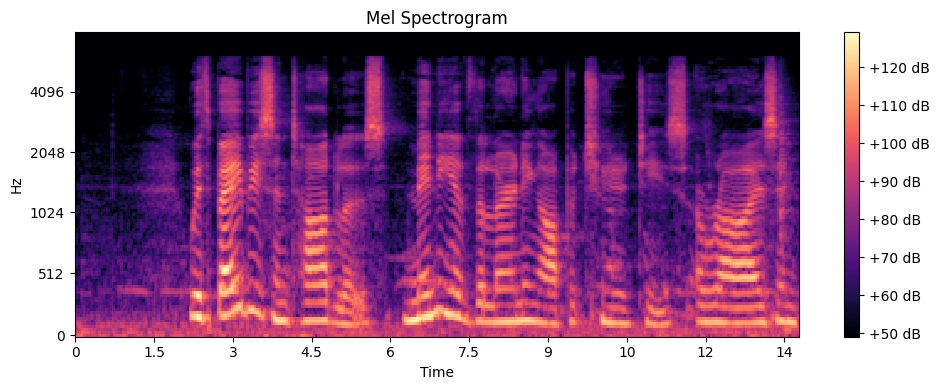

In [10]:
# Function to plot a Mel spectrogram from a saved .npy file
def plot_spectro(filepath):
    # Load the saved Mel spectrogram from the .npy file
    spectro_array = np.load(filepath).reshape(128, -1)  # Adjust the shape based on your flattened format

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectro_array, sr=16000, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

path = '/content/drive/MyDrive/Colab Notebooks/Dataset_Melspectrograms/ChildrenPlayTrimmed/DGls-Z4e6OI_7885-8029.npy'
plot_spectro(path)
